In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import numpy as np

In [2]:
df_adjusted = pd.read_pickle('../Dataframes/df_compiled_adjusted_daily_temp_gbg_save.pkl')

In [4]:
df_original = pd.read_pickle('../Dataframes/df_compiled_daily_temp_gbg_save.pkl')

Get first summer days

In [5]:
df_original['Month'] = df_original['Datum'].dt.month
df_original['Year'] = df_original['Datum'].dt.year
df_original['Day_of_year'] = df_original['Datum'].dt.day_of_year

In [6]:
df_original['Over_10_5_days_in_a_row'] = 0

In [7]:
for i in range(1, len(df_original)):
    if df_original['Snittemperatur'].iloc[i] >= 10:
        counter += 1
    else:
        counter = 0
        pass
    if counter == 5:
        df_original['Over_10_5_days_in_a_row'].iloc[i] = 1
        counter = 0
    else:
        pass

C:\Users\olofs\AppData\Local\Temp\ipykernel_5848\3356718473.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_original['Over_10_5_days_in_a_row'].iloc[i] = 1
C:\Users\olofs\AppData\Local\Temp\ipykernel_5848\3356718473.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_original['Over_10_5_days_in_a_row'].iloc[i] = 1
C:\Users\olofs\AppData\Local\Temp\ipykernel_5848\3356718473.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d

In [8]:
df_adjusted

,Datum,Kvalitet,Snittemperatur,Year,Month,day_of_year,Over_10_5_days_in_a_row,0_or_under_5_days_in_a_row
0,1944-01-01,G,3.20,1944,1,1,0,0
1,1944-01-02,G,3.60,1944,1,2,0,0
2,1944-01-03,G,2.80,1944,1,3,0,0
3,1944-01-04,G,-4.47,1944,1,4,0,0
4,1944-01-05,G,-1.40,1944,1,5,0,0
...,...,...,...,...,...,...,...,...
29002,2023-06-27,G,17.02,2023,6,178,0,0
29003,2023-06-28,G,18.56,2023,6,179,0,0
29004,2023-06-29,G,18.06,2023,6,180,0,0
29005,2023-06-30,G,16.24,2023,6,181,0,0


In [9]:
def first_summer_day_original(year):
    for ind, val in df_original[df_original['Year'] == year].iterrows():
        if df_original['Over_10_5_days_in_a_row'][ind] == 1:
            first_summer_day = df_original['Datum'][ind-4]
            return first_summer_day
            break
        else:
            pass
    return None

In [10]:
def first_summer_day_adjusted(year):
    for ind, val in df_adjusted[df_adjusted['Year'] == year].iterrows():
        if df_adjusted['Over_10_5_days_in_a_row'][ind] == 1:
            first_summer_day = df_adjusted['Datum'][ind-4]
            return first_summer_day
            break
        else:
            pass
    return None

In [11]:
summer_days_original = []
for i in range(1944, 2023):
    summer = pd.to_datetime(first_summer_day_original(i))
    summer_days_original.append(summer)


summer_days_adjusted= []
for i in range(1944, 2023):
    summer = pd.to_datetime(first_summer_day_adjusted(i))
    summer_days_adjusted.append(summer)

In [12]:
years_original = []

for x, i in enumerate(summer_days_original):
    string = str(i.year)
    years_original.append(string)

months_original = []

for x, i in enumerate(summer_days_original):
    string = str(i.month)
    months_original.append(string)

days_original = []
for x, i in enumerate(summer_days_original):
    string = str(i.day)
    if len(string) < 2:
        string = f'0{string}'
    days_original.append(string)

In [13]:
years_adjusted = []

for x, i in enumerate(summer_days_adjusted):
    string = str(i.year)
    years_adjusted.append(string)

months_adjusted = []

for x, i in enumerate(summer_days_adjusted):
    string = str(i.month)
    months_adjusted.append(string)

days_adjusted = []
for x, i in enumerate(summer_days_adjusted):
    string = str(i.day)
    if len(string) < 2:
        string = f'0{string}'
    days_adjusted.append(string)

In [14]:
day_of_year_original = []
for i in summer_days_original:
    day_of_year_original.append(i.day_of_year)

In [15]:
day_of_year_adjusted = []
for i in summer_days_adjusted:
    day_of_year_adjusted.append(i.day_of_year)

In [16]:
df_summer_days_original = pd.DataFrame({'Year': years_original, 'Month': months_original, 
                                        'Day': days_original, 'day_of_year': day_of_year_original})

In [17]:
df_summer_days_adjusted = pd.DataFrame({'Year': years_adjusted, 'Month': months_adjusted, 
                                        'Day': days_adjusted, 'day_of_year': day_of_year_adjusted})

In [18]:
df_summer_days_original['Year'] = pd.to_numeric(df_summer_days_original['Year'])
df_summer_days_original['Month'] = pd.to_numeric(df_summer_days_original['Month'])
df_summer_days_original['Day'] = pd.to_numeric(df_summer_days_original['Day'])

In [19]:
df_summer_days_adjusted['Year'] = pd.to_numeric(df_summer_days_adjusted['Year'])
df_summer_days_adjusted['Month'] = pd.to_numeric(df_summer_days_adjusted['Month'])
df_summer_days_adjusted['Day'] = pd.to_numeric(df_summer_days_adjusted['Day'])

In [20]:
# df_summer_days_original.to_pickle('../Dataframes/df_first_summer_days_original.pkl')

In [21]:
# df_summer_days_adjusted.to_pickle('../Dataframes/df_first_summer_days_adjusted.pkl')

In [22]:
# df_summer_days_original.to_csv('../data/first_summer_days_original.csv', mode='w', index=False)

In [23]:
# df_summer_days_adjusted.to_csv('../data/first_summer_days_adjusted.csv', mode='w', index=False)

Prepare for the plot

In [24]:
ticlist = [100, 110, 120, 130, 140, 150, 160]

In [25]:
first_day = datetime(1944, 1, 1)
iss = first_day+timedelta(days=99)
iss

datetime.datetime(1944, 4, 9, 0, 0)

In [26]:
datelist = []
for i in ticlist:
    datenum = first_day+timedelta(days=i-1)
    month = datenum.strftime('%m')
    day = datenum.strftime('%d')
    datelist.append(f'{month}-{day}')

In [27]:
datelist

['04-09', '04-19', '04-29', '05-09', '05-19', '05-29', '06-08']

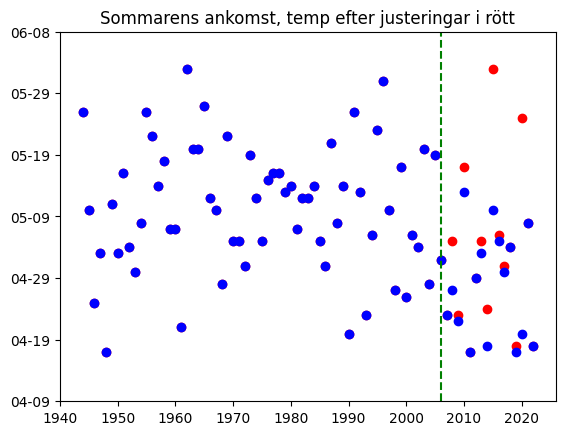

In [74]:
plt.figure()

plt.scatter(x=df_summer_days_adjusted['Year'], y=df_summer_days_adjusted['day_of_year'], c='r')
plt.scatter(x=df_summer_days_original['Year'], y=df_summer_days_original['day_of_year'], c='b')
plt.axvline(x=2006, c='g', linestyle='--')
plt.yticks(ticks=ticlist, labels=datelist)
plt.xticks(ticks=[1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020])
plt.title('Sommarens ankomst, temp efter justeringar i rött')
plt.show()

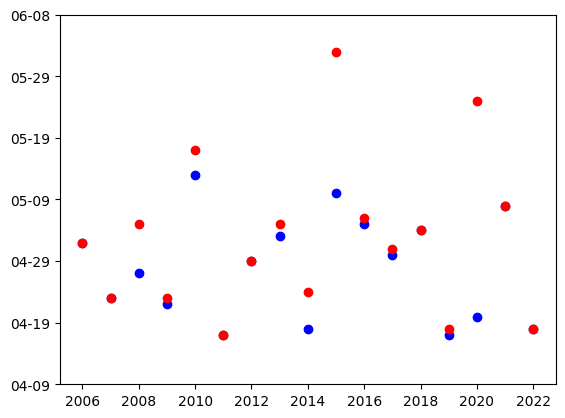

In [67]:
plt.figure()

plt.scatter(x=df_summer_days_original[df_summer_days_original['Year'] > 2005]['Year'], 
            y=df_summer_days_original[df_summer_days_original['Year'] > 2005]['day_of_year'], c='b',)
plt.scatter(x=df_summer_days_adjusted[df_summer_days_adjusted['Year'] > 2005]['Year'], 
            y=df_summer_days_adjusted[df_summer_days_adjusted['Year'] > 2005]['day_of_year'], c='r')
# plt.axvline(x=2006, c='g', linestyle='--')
plt.yticks(ticks=ticlist, labels=datelist)
plt.show()

In [30]:
days_original = [i for i in df_summer_days_original[df_summer_days_original['Year'] > 2005]['day_of_year']]

In [31]:
days_adjusted = [i for i in df_summer_days_adjusted[df_summer_days_adjusted['Year'] > 2005]['day_of_year']]

In [32]:
years_comp = [i for i in df_summer_days_adjusted[df_summer_days_adjusted['Year'] > 2005]['Year']]

In [33]:
df_comp_org_and_adj_days = pd.DataFrame({'Year': years_comp, 'Original': days_original, 'Adjusted': days_adjusted})

In [34]:
df_comp_org_and_adj_days['Diff'] = df_comp_org_and_adj_days['Original'] - df_comp_org_and_adj_days['Adjusted']

In [35]:
df_comp_org_and_adj_days['Diff'].mean()

-4.823529411764706

In [36]:
df_comp_org_and_adj_days['Diff'].median()

-1.0

In [39]:
df_comp_org_and_adj_days.sort_values(by='Year')

,Year,Original,Adjusted,Diff
0,2006,123,123,0
1,2007,114,114,0
2,2008,118,126,-8
3,2009,113,114,-1
4,2010,134,138,-4
5,2011,108,108,0
6,2012,120,120,0
7,2013,124,126,-2
8,2014,109,115,-6
9,2015,131,154,-23


In [85]:
mean_original = df_comp_org_and_adj_days['Original'].mean().round(0)
mean_adjusted = df_comp_org_and_adj_days['Adjusted'].mean().round(0)

first_day = datetime(2023, 1, 1)
mean_date_original = first_day+timedelta(days=mean_original)
mean_date_adjusted = first_day+timedelta(days=mean_adjusted)
print(f'{mean_original} {mean_date_original}')
print(f'{mean_adjusted} {mean_date_adjusted}')


119.0 2023-04-30 00:00:00
124.0 2023-05-05 00:00:00


datetime.datetime(2023, 4, 30, 0, 0)

In [40]:
# df_comp_org_and_adj_days.to_pickle('../Dataframes/summer_days_diff.pkl')

PLot trendline using seaborn


<Figure size 640x480 with 0 Axes>

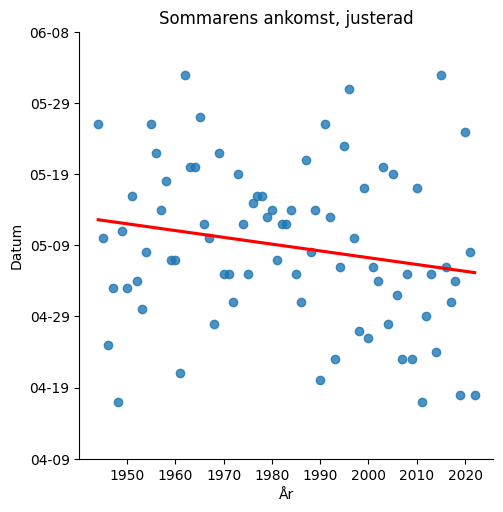

In [75]:
plt.figure()
sns.lmplot(df_summer_days_adjusted, x='Year', y='day_of_year', ci=False, line_kws=({'color': 'r'}))
plt.yticks(ticks=ticlist, labels=datelist)
plt.ylabel('Datum')
plt.xlabel('År')
plt.title('Sommarens ankomst, justerad')
plt.show()